In [7]:
import os
import pandas as pd
# visualizing data
import warnings
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import torch
import torch.nn as nn
import numpy as np
from imblearn.over_sampling import SMOTE  
train_on_gpu = torch.cuda.is_available()
# train_on_gpu = False
if not train_on_gpu:
    print('CUDA is not available.')
else:
    print('CUDA is available.')

CUDA is available.


In [8]:
from torch.utils.data import Dataset, DataLoader
class MyDataLoader(Dataset):
  

    def __init__(self, data_frame, nromalisation = True):

        self.data_frame = data_frame
        self.nromalisation = nromalisation
        
        
    def __len__(self):
        return len(self.data_frame)
    

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
      
        sample_list = self.data_frame.iloc[idx, 1]
        sample_list = np.array(sample_list[1:-1].split()).astype(int)
        
        ori_card_list = self.data_frame.iloc[idx, 2]
        ori_card_list = np.array(ori_card_list[1:-1].split()).astype(int)
        card_list = np.array([0,0,0,0,0,0,0,0,0,0])
        card_list[:9] = ori_card_list[:9]
        card_list[9] = np.sum(ori_card_list[9:])
        
        if self.nromalisation:
            input_data = np.append(sample_list/31,card_list/8)
        else:
            input_data = np.append(sample_list,card_list)
#         print(card_list)   
        labels = self.data_frame.iloc[idx, 3]
        if labels > 0.5:
            labels = 0
        else:
            labels = 1
              
        input_data = input_data.astype(np.float)
        labels = np.array(labels)
        labels = labels.astype(np.float)
        sample = {'data': input_data, 'labels': labels}
        
     
        return sample
    

In [9]:
pathidentity='C:/Users/13862/Desktop/RA_BJ/sampled_prob.csv'
data = pd.read_csv(pathidentity)
classes = [ 'hit', 'stand'] # 0 for hit 1 for stand

df=data
np.random.seed(33)
df = shuffle(df)
part=len(df)//10
print(part)
df_train = df[:int(8*part)]
df_test = df[int(8*part):int(9*part)]
df_val = df[int(9*part):]
thesize=256

dataset_train = MyDataLoader(df_train)
dataset_test = MyDataLoader(df_test)
dataset_val = MyDataLoader(df_val)


5000


In [10]:
batch_size = 1024
num_workers=0


train_loader = DataLoader(dataset= dataset_train, batch_size=batch_size, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(dataset= dataset_test, batch_size=batch_size, 
                         shuffle=True, num_workers=num_workers)

val_loader = DataLoader(dataset= dataset_val, batch_size=batch_size, 
                         shuffle=True, num_workers=num_workers)



for i_batch, sample_batched in enumerate(train_loader):
    data_batch, labels_batch = sample_batched['data'], sample_batched['labels']
    print(data_batch.size())
    data_batch = data_batch.numpy()
    labels_batch = labels_batch.int()
    for idx in np.arange(batch_size):
        print(data_batch[idx], labels_batch[idx])


torch.Size([1024, 12])
[0.64516129 0.25806452 0.         0.         0.125      0.25
 0.         0.25       0.375      0.25       0.         0.375     ]
[0.48387097 0.22580645 0.125      0.25       0.125      0.125
 0.25       0.         0.25       0.         0.25       0.25      ]
[0.41935484 0.32258065 0.         0.         0.125      0.125
 0.125      0.125      0.25       0.         0.         0.875     ]
[0.35483871 0.35483871 0.375      0.125      0.         0.125
 0.125      0.         0.375      0.         0.125      0.375     ]
[0.58064516 0.32258065 0.125      0.         0.125      0.125
 0.         0.25       0.25       0.         0.125      0.625     ]
[0.32258065 0.35483871 0.125      0.125      0.125      0.25
 0.125      0.25       0.25       0.125      0.         0.25      ]
[0.4516129  0.32258065 0.         0.25       0.         0.125
 0.125      0.125      0.         0.125      0.25       0.625     ]
[0.58064516 0.25806452 0.125      0.125      0.125      0.125
 0.    

torch.Size([1024, 12])
[0.61290323 0.19354839 0.125      0.25       0.         0.
 0.25       0.25       0.         0.         0.25       0.5       ]
[0.5483871  0.16129032 0.125      0.         0.125      0.
 0.125      0.125      0.25       0.125      0.         0.75      ]
[0.58064516 0.22580645 0.25       0.25       0.125      0.125
 0.125      0.         0.25       0.25       0.125      0.125     ]
[0.51612903 0.09677419 0.         0.125      0.125      0.
 0.25       0.125      0.25       0.125      0.125      0.5       ]
[0.48387097 0.19354839 0.125      0.25       0.         0.125
 0.25       0.25       0.125      0.         0.125      0.375     ]
[0.48387097 0.32258065 0.25       0.125      0.         0.
 0.125      0.125      0.125      0.125      0.         0.75      ]
[0.58064516 0.29032258 0.25       0.125      0.25       0.
 0.25       0.         0.125      0.         0.125      0.5       ]
[0.5483871  0.25806452 0.         0.         0.125      0.125
 0.25       0.      

torch.Size([1024, 12])
[0.16129032 0.35483871 0.25       0.5        0.125      0.125
 0.         0.         0.25       0.         0.25       0.125     ]
[0.5483871  0.32258065 0.25       0.125      0.125      0.125
 0.         0.25       0.125      0.         0.25       0.375     ]
[0.64516129 0.29032258 0.25       0.         0.         0.125
 0.125      0.         0.25       0.25       0.25       0.375     ]
[0.32258065 0.32258065 0.125      0.25       0.125      0.25
 0.125      0.25       0.         0.125      0.         0.375     ]
[0.29032258 0.12903226 0.125      0.         0.125      0.125
 0.125      0.125      0.         0.25       0.125      0.625     ]
[0.5483871  0.22580645 0.25       0.         0.375      0.
 0.125      0.125      0.25       0.125      0.         0.375     ]
[0.51612903 0.32258065 0.125      0.         0.125      0.
 0.         0.125      0.25       0.125      0.125      0.75      ]
[0.19354839 0.29032258 0.125      0.25       0.25       0.
 0.         0. 

torch.Size([1024, 12])
[0.61290323 0.32258065 0.25       0.125      0.125      0.
 0.375      0.         0.125      0.375      0.         0.25      ]
[0.4516129  0.32258065 0.         0.375      0.         0.125
 0.         0.375      0.         0.25       0.         0.5       ]
[0.35483871 0.25806452 0.         0.         0.         0.25
 0.25       0.375      0.         0.125      0.125      0.5       ]
[0.64516129 0.12903226 0.         0.         0.125      0.125
 0.         0.125      0.         0.125      0.25       0.875     ]
[0.35483871 0.29032258 0.         0.375      0.125      0.125
 0.25       0.125      0.         0.         0.25       0.375     ]
[0.29032258 0.25806452 0.25       0.125      0.25       0.125
 0.125      0.25       0.125      0.25       0.         0.125     ]
[0.48387097 0.16129032 0.125      0.         0.125      0.
 0.25       0.         0.125      0.         0.125      0.875     ]
[0.4516129  0.32258065 0.         0.125      0.375      0.125
 0.125      

torch.Size([1024, 12])
[0.32258065 0.22580645 0.         0.25       0.125      0.
 0.25       0.125      0.125      0.125      0.         0.625     ]
[0.51612903 0.19354839 0.125      0.125      0.125      0.
 0.125      0.25       0.125      0.25       0.125      0.375     ]
[0.67741935 0.29032258 0.25       0.125      0.         0.25
 0.         0.125      0.25       0.         0.125      0.5       ]
[0.58064516 0.16129032 0.         0.25       0.25       0.
 0.125      0.         0.         0.125      0.125      0.75      ]
[0.48387097 0.22580645 0.125      0.         0.         0.125
 0.125      0.         0.125      0.25       0.125      0.75      ]
[0.51612903 0.29032258 0.         0.25       0.         0.25
 0.125      0.25       0.125      0.         0.125      0.5       ]
[0.38709677 0.29032258 0.125      0.125      0.125      0.
 0.25       0.125      0.125      0.375      0.125      0.25      ]
[0.29032258 0.29032258 0.125      0.25       0.375      0.25
 0.125      0.125   

torch.Size([1024, 12])
[0.29032258 0.32258065 0.         0.125      0.         0.25
 0.375      0.125      0.125      0.125      0.         0.5       ]
[0.35483871 0.06451613 0.125      0.375      0.125      0.125
 0.125      0.125      0.125      0.         0.25       0.25      ]
[0.67741935 0.19354839 0.125      0.125      0.125      0.125
 0.125      0.125      0.         0.         0.25       0.625     ]
[0.67741935 0.32258065 0.25       0.125      0.125      0.
 0.25       0.125      0.125      0.         0.125      0.5       ]
[0.32258065 0.32258065 0.125      0.125      0.25       0.125
 0.25       0.125      0.125      0.         0.         0.5       ]
[0.38709677 0.12903226 0.375      0.         0.         0.125
 0.         0.125      0.125      0.125      0.25       0.5       ]
[0.5483871  0.12903226 0.125      0.125      0.         0.125
 0.125      0.25       0.125      0.125      0.125      0.5       ]
[0.25806452 0.29032258 0.25       0.25       0.25       0.
 0.25       

torch.Size([1024, 12])
[0.5483871  0.16129032 0.125      0.         0.125      0.125
 0.25       0.25       0.25       0.         0.         0.5       ]
[0.4516129  0.25806452 0.25       0.         0.125      0.
 0.125      0.125      0.125      0.375      0.         0.5       ]
[0.38709677 0.22580645 0.125      0.25       0.125      0.
 0.125      0.125      0.25       0.         0.         0.625     ]
[0.67741935 0.32258065 0.125      0.25       0.125      0.25
 0.         0.         0.         0.125      0.125      0.625     ]
[0.61290323 0.35483871 0.375      0.25       0.         0.125
 0.         0.125      0.125      0.125      0.         0.5       ]
[0.51612903 0.16129032 0.         0.125      0.125      0.125
 0.25       0.125      0.         0.25       0.125      0.5       ]
[0.5483871  0.06451613 0.125      0.25       0.         0.
 0.25       0.125      0.125      0.25       0.         0.5       ]
[0.5483871  0.35483871 0.25       0.125      0.25       0.125
 0.         0.1

torch.Size([1024, 12])
[0.41935484 0.35483871 0.125      0.         0.125      0.125
 0.25       0.25       0.         0.25       0.         0.5       ]
[0.58064516 0.06451613 0.125      0.25       0.25       0.125
 0.125      0.125      0.125      0.25       0.         0.25      ]
[0.4516129  0.32258065 0.125      0.25       0.125      0.125
 0.         0.25       0.125      0.         0.125      0.5       ]
[0.64516129 0.09677419 0.         0.125      0.125      0.
 0.         0.25       0.125      0.25       0.         0.75      ]
[0.38709677 0.25806452 0.125      0.         0.375      0.
 0.125      0.         0.125      0.125      0.         0.75      ]
[0.38709677 0.25806452 0.125      0.25       0.         0.125
 0.25       0.125      0.         0.375      0.         0.375     ]
[0.38709677 0.25806452 0.         0.125      0.125      0.125
 0.25       0.         0.         0.25       0.125      0.625     ]
[0.67741935 0.09677419 0.125      0.125      0.25       0.25
 0.         

 0.         0.375      0.125      0.125      0.25       0.5       ]
[0.29032258 0.09677419 0.         0.125      0.25       0.125
 0.125      0.125      0.         0.         0.125      0.75      ]
[0.51612903 0.19354839 0.125      0.125      0.125      0.
 0.         0.375      0.25       0.25       0.125      0.25      ]
[0.58064516 0.32258065 0.125      0.125      0.125      0.125
 0.25       0.         0.         0.125      0.         0.75      ]
[0.41935484 0.35483871 0.5        0.125      0.125      0.
 0.         0.         0.125      0.25       0.25       0.25      ]
[0.4516129  0.22580645 0.         0.         0.125      0.
 0.         0.25       0.375      0.375      0.125      0.375     ]
[0.35483871 0.32258065 0.25       0.125      0.125      0.
 0.         0.25       0.125      0.125      0.125      0.5       ]
[0.29032258 0.19354839 0.125      0.125      0.125      0.25
 0.125      0.25       0.         0.125      0.125      0.375     ]
[0.64516129 0.19354839 0.         0

 0.25       0.125      0.125      0.         0.125      0.625     ]
[0.4516129  0.16129032 0.         0.         0.125      0.125
 0.375      0.125      0.125      0.125      0.25       0.375     ]
[0.4516129  0.06451613 0.25       0.125      0.125      0.25
 0.125      0.125      0.         0.         0.125      0.5       ]
[0.67741935 0.32258065 0.125      0.         0.375      0.
 0.         0.25       0.         0.25       0.         0.625     ]
[0.41935484 0.12903226 0.         0.125      0.375      0.125
 0.125      0.         0.125      0.125      0.125      0.5       ]
[0.61290323 0.09677419 0.125      0.125      0.125      0.125
 0.         0.25       0.125      0.125      0.25       0.375     ]
[0.64516129 0.32258065 0.125      0.         0.         0.125
 0.         0.125      0.125      0.125      0.         1.        ]
[0.35483871 0.29032258 0.         0.125      0.125      0.25
 0.25       0.125      0.25       0.125      0.125      0.25      ]
[0.41935484 0.06451613 0.25

torch.Size([1024, 12])
[0.61290323 0.16129032 0.         0.125      0.125      0.25
 0.125      0.         0.125      0.125      0.125      0.625     ]
[0.64516129 0.19354839 0.25       0.125      0.         0.125
 0.125      0.25       0.25       0.         0.125      0.375     ]
[0.64516129 0.32258065 0.125      0.         0.125      0.
 0.25       0.         0.25       0.         0.125      0.75      ]
[0.51612903 0.32258065 0.         0.125      0.125      0.25
 0.125      0.125      0.         0.125      0.375      0.375     ]
[0.38709677 0.32258065 0.         0.25       0.         0.
 0.125      0.         0.         0.125      0.125      1.        ]
[0.48387097 0.22580645 0.         0.         0.125      0.125
 0.25       0.125      0.125      0.125      0.         0.75      ]
[0.25806452 0.12903226 0.25       0.         0.375      0.25
 0.25       0.125      0.25       0.125      0.         0.        ]
[0.48387097 0.22580645 0.         0.         0.125      0.125
 0.         0.

torch.Size([1024, 12])
[0.41935484 0.12903226 0.25       0.         0.         0.125
 0.125      0.125      0.25       0.125      0.125      0.5       ]
[0.58064516 0.25806452 0.125      0.25       0.125      0.
 0.         0.125      0.125      0.375      0.         0.5       ]
[0.61290323 0.32258065 0.         0.125      0.125      0.
 0.         0.25       0.         0.         0.125      1.        ]
[0.5483871  0.09677419 0.125      0.125      0.125      0.
 0.125      0.25       0.125      0.         0.25       0.5       ]
[0.51612903 0.29032258 0.25       0.         0.25       0.125
 0.         0.125      0.25       0.         0.25       0.375     ]
[0.35483871 0.32258065 0.125      0.125      0.125      0.25
 0.25       0.25       0.125      0.125      0.125      0.125     ]
[0.5483871  0.35483871 0.125      0.         0.         0.
 0.125      0.125      0.125      0.25       0.25       0.625     ]
[0.41935484 0.29032258 0.         0.125      0.375      0.125
 0.         0.    

torch.Size([1024, 12])
[0.58064516 0.06451613 0.125      0.125      0.125      0.125
 0.25       0.         0.         0.125      0.125      0.625     ]
[0.58064516 0.32258065 0.375      0.125      0.125      0.
 0.         0.25       0.125      0.25       0.         0.375     ]
[0.48387097 0.09677419 0.         0.125      0.375      0.
 0.125      0.         0.         0.25       0.25       0.5       ]
[0.35483871 0.22580645 0.125      0.125      0.125      0.
 0.125      0.25       0.25       0.25       0.125      0.25      ]
[0.25806452 0.32258065 0.125      0.25       0.         0.
 0.         0.25       0.         0.25       0.125      0.625     ]
[0.51612903 0.09677419 0.125      0.         0.25       0.125
 0.125      0.125      0.125      0.125      0.125      0.5       ]
[0.48387097 0.09677419 0.         0.         0.125      0.125
 0.         0.375      0.125      0.25       0.125      0.5       ]
[0.35483871 0.32258065 0.         0.125      0.         0.125
 0.25       0.125

torch.Size([1024, 12])
[0.64516129 0.09677419 0.         0.         0.125      0.125
 0.25       0.125      0.125      0.         0.125      0.75      ]
[0.41935484 0.32258065 0.125      0.         0.25       0.125
 0.         0.25       0.125      0.         0.25       0.5       ]
[0.58064516 0.19354839 0.125      0.         0.         0.25
 0.125      0.25       0.25       0.         0.125      0.5       ]
[0.67741935 0.19354839 0.125      0.25       0.125      0.125
 0.         0.25       0.125      0.         0.         0.625     ]
[0.58064516 0.06451613 0.125      0.25       0.         0.125
 0.         0.125      0.125      0.125      0.         0.75      ]
[0.5483871  0.32258065 0.125      0.         0.125      0.25
 0.125      0.         0.25       0.125      0.25       0.375     ]
[0.64516129 0.19354839 0.         0.125      0.25       0.
 0.25       0.25       0.125      0.         0.         0.625     ]
[0.48387097 0.32258065 0.125      0.125      0.         0.
 0.25       0

torch.Size([1024, 12])
[0.48387097 0.35483871 0.125      0.125      0.         0.125
 0.25       0.         0.375      0.25       0.125      0.25      ]
[0.58064516 0.22580645 0.125      0.         0.125      0.
 0.125      0.125      0.25       0.375      0.         0.5       ]
[0.58064516 0.22580645 0.125      0.125      0.25       0.125
 0.375      0.         0.125      0.         0.125      0.5       ]
[0.58064516 0.09677419 0.         0.125      0.25       0.
 0.         0.25       0.125      0.125      0.125      0.625     ]
[0.51612903 0.29032258 0.25       0.         0.         0.25
 0.25       0.125      0.125      0.         0.25       0.375     ]
[0.48387097 0.22580645 0.125      0.125      0.125      0.25
 0.25       0.125      0.125      0.         0.         0.5       ]
[0.64516129 0.32258065 0.25       0.125      0.375      0.
 0.         0.125      0.125      0.25       0.125      0.25      ]
[0.5483871  0.12903226 0.         0.         0.125      0.125
 0.125      0.  

torch.Size([1024, 12])
[0.38709677 0.06451613 0.125      0.125      0.         0.125
 0.125      0.125      0.125      0.125      0.125      0.625     ]
[0.4516129  0.12903226 0.         0.         0.25       0.25
 0.         0.25       0.125      0.         0.         0.75      ]
[0.41935484 0.06451613 0.         0.125      0.125      0.
 0.25       0.125      0.125      0.125      0.125      0.625     ]
[0.48387097 0.16129032 0.25       0.         0.25       0.125
 0.25       0.         0.         0.         0.125      0.625     ]
[0.51612903 0.32258065 0.         0.25       0.         0.25
 0.125      0.25       0.125      0.         0.         0.625     ]
[0.64516129 0.35483871 0.125      0.25       0.25       0.125
 0.         0.         0.         0.125      0.         0.75      ]
[0.51612903 0.32258065 0.25       0.25       0.         0.125
 0.125      0.125      0.         0.125      0.         0.625     ]
[0.41935484 0.32258065 0.         0.25       0.25       0.
 0.         0

torch.Size([1024, 12])
[0.48387097 0.35483871 0.25       0.         0.         0.125
 0.125      0.125      0.375      0.125      0.25       0.25      ]
[0.64516129 0.32258065 0.125      0.125      0.125      0.
 0.125      0.125      0.         0.         0.25       0.75      ]
[0.58064516 0.06451613 0.125      0.375      0.         0.125
 0.         0.         0.         0.125      0.         0.875     ]
[0.48387097 0.09677419 0.         0.         0.25       0.
 0.25       0.125      0.         0.         0.         1.        ]
[0.67741935 0.32258065 0.25       0.         0.125      0.
 0.25       0.         0.25       0.125      0.         0.625     ]
[0.51612903 0.29032258 0.         0.25       0.         0.25
 0.25       0.375      0.         0.25       0.125      0.125     ]
[0.4516129  0.35483871 0.25       0.125      0.125      0.125
 0.25       0.125      0.125      0.         0.         0.5       ]
[0.29032258 0.32258065 0.125      0.         0.         0.25
 0.25       0.  

torch.Size([1024, 12])
[0.5483871  0.19354839 0.125      0.375      0.         0.125
 0.25       0.25       0.125      0.         0.         0.375     ]
[0.41935484 0.06451613 0.125      0.125      0.125      0.
 0.         0.25       0.125      0.125      0.125      0.625     ]
[0.58064516 0.22580645 0.125      0.         0.125      0.125
 0.         0.125      0.375      0.25       0.25       0.25      ]
[0.41935484 0.32258065 0.125      0.125      0.25       0.
 0.25       0.125      0.         0.125      0.125      0.5       ]
[0.5483871  0.06451613 0.125      0.375      0.125      0.
 0.         0.         0.25       0.         0.         0.75      ]
[0.32258065 0.19354839 0.125      0.25       0.         0.25
 0.25       0.125      0.125      0.25       0.         0.25      ]
[0.58064516 0.32258065 0.25       0.25       0.         0.125
 0.125      0.125      0.25       0.         0.         0.5       ]
[0.51612903 0.12903226 0.25       0.         0.         0.125
 0.125      0.2

torch.Size([1024, 12])
[0.29032258 0.19354839 0.125      0.125      0.125      0.
 0.         0.375      0.         0.25       0.125      0.5       ]
[0.41935484 0.32258065 0.125      0.125      0.125      0.125
 0.25       0.         0.         0.25       0.         0.625     ]
[0.38709677 0.32258065 0.125      0.25       0.125      0.25
 0.125      0.125      0.         0.25       0.125      0.25      ]
[0.32258065 0.09677419 0.125      0.         0.25       0.125
 0.125      0.25       0.125      0.         0.         0.625     ]
[0.61290323 0.06451613 0.         0.125      0.125      0.125
 0.         0.125      0.25       0.125      0.125      0.625     ]
[0.51612903 0.12903226 0.25       0.         0.125      0.25
 0.25       0.125      0.         0.         0.25       0.375     ]
[0.5483871  0.32258065 0.125      0.125      0.         0.125
 0.         0.25       0.         0.25       0.375      0.375     ]
[0.5483871  0.32258065 0.25       0.125      0.125      0.
 0.125      0

torch.Size([1024, 12])
[0.38709677 0.06451613 0.         0.125      0.125      0.125
 0.125      0.375      0.25       0.125      0.         0.375     ]
[0.38709677 0.32258065 0.         0.125      0.125      0.25
 0.125      0.         0.125      0.125      0.125      0.625     ]
[0.29032258 0.32258065 0.125      0.25       0.         0.25
 0.125      0.         0.25       0.125      0.         0.5       ]
[0.32258065 0.32258065 0.125      0.125      0.         0.125
 0.125      0.25       0.125      0.125      0.         0.625     ]
[0.64516129 0.32258065 0.375      0.125      0.125      0.125
 0.         0.         0.         0.125      0.         0.75      ]
[0.4516129  0.32258065 0.25       0.125      0.125      0.
 0.125      0.25       0.         0.         0.125      0.625     ]
[0.38709677 0.32258065 0.         0.125      0.125      0.125
 0.         0.         0.25       0.375      0.25       0.375     ]
[0.5483871  0.12903226 0.         0.125      0.125      0.25
 0.        

torch.Size([1024, 12])
[0.32258065 0.09677419 0.         0.125      0.25       0.125
 0.125      0.125      0.         0.375      0.         0.5       ]
[0.61290323 0.19354839 0.         0.         0.         0.
 0.25       0.25       0.         0.25       0.25       0.625     ]
[0.5483871  0.32258065 0.125      0.125      0.125      0.
 0.125      0.125      0.125      0.25       0.25       0.375     ]
[0.48387097 0.06451613 0.         0.25       0.375      0.
 0.125      0.25       0.         0.         0.125      0.5       ]
[0.48387097 0.16129032 0.125      0.125      0.125      0.25
 0.25       0.125      0.125      0.125      0.125      0.25      ]
[0.64516129 0.12903226 0.125      0.125      0.25       0.25
 0.         0.         0.125      0.125      0.         0.625     ]
[0.19354839 0.09677419 0.25       0.125      0.375      0.25
 0.         0.         0.         0.         0.125      0.5       ]
[0.41935484 0.12903226 0.25       0.375      0.         0.125
 0.125      0.125

torch.Size([1024, 12])
[0.58064516 0.09677419 0.125      0.25       0.25       0.25
 0.         0.         0.         0.125      0.25       0.375     ]
[0.64516129 0.25806452 0.25       0.         0.125      0.
 0.125      0.         0.125      0.125      0.375      0.5       ]
[0.38709677 0.22580645 0.125      0.375      0.         0.125
 0.         0.         0.375      0.125      0.         0.5       ]
[0.32258065 0.22580645 0.25       0.125      0.125      0.
 0.125      0.25       0.125      0.125      0.125      0.375     ]
[0.61290323 0.35483871 0.25       0.25       0.         0.125
 0.125      0.125      0.125      0.125      0.125      0.375     ]
[0.48387097 0.09677419 0.         0.25       0.375      0.125
 0.125      0.125      0.125      0.         0.375      0.25      ]
[0.58064516 0.35483871 0.375      0.         0.125      0.
 0.25       0.25       0.125      0.125      0.         0.375     ]
[0.22580645 0.29032258 0.125      0.125      0.125      0.25
 0.         0.  

torch.Size([1024, 12])
[0.58064516 0.32258065 0.         0.375      0.         0.125
 0.         0.25       0.         0.25       0.125      0.5       ]
[0.5483871  0.19354839 0.         0.125      0.125      0.
 0.25       0.25       0.         0.125      0.25       0.5       ]
[0.32258065 0.12903226 0.125      0.25       0.25       0.125
 0.125      0.125      0.125      0.125      0.125      0.25      ]
[0.5483871  0.09677419 0.125      0.125      0.125      0.125
 0.375      0.         0.125      0.125      0.125      0.375     ]
[0.51612903 0.09677419 0.125      0.25       0.25       0.125
 0.375      0.         0.25       0.125      0.         0.125     ]
[0.32258065 0.12903226 0.         0.         0.         0.375
 0.375      0.125      0.         0.25       0.125      0.375     ]
[0.32258065 0.32258065 0.125      0.         0.         0.125
 0.375      0.         0.125      0.125      0.25       0.5       ]
[0.58064516 0.32258065 0.         0.125      0.25       0.125
 0.     

torch.Size([1024, 12])
[0.35483871 0.32258065 0.         0.25       0.125      0.
 0.         0.125      0.         0.125      0.25       0.75      ]
[0.51612903 0.22580645 0.125      0.125      0.         0.
 0.125      0.25       0.125      0.125      0.125      0.625     ]
[0.38709677 0.22580645 0.25       0.125      0.125      0.125
 0.125      0.125      0.125      0.25       0.         0.375     ]
[0.4516129  0.35483871 0.375      0.25       0.         0.125
 0.125      0.         0.125      0.125      0.         0.5       ]
[0.38709677 0.12903226 0.25       0.125      0.         0.25
 0.125      0.125      0.125      0.         0.125      0.5       ]
[0.51612903 0.32258065 0.125      0.125      0.125      0.25
 0.25       0.125      0.125      0.         0.         0.5       ]
[0.38709677 0.29032258 0.         0.         0.125      0.
 0.5        0.         0.375      0.         0.25       0.375     ]
[0.41935484 0.09677419 0.         0.125      0.125      0.375
 0.125      0.25

torch.Size([1024, 12])
[0.38709677 0.16129032 0.         0.125      0.         0.125
 0.25       0.125      0.         0.25       0.125      0.625     ]
[0.41935484 0.32258065 0.         0.         0.25       0.
 0.25       0.125      0.         0.         0.25       0.75      ]
[0.38709677 0.32258065 0.125      0.25       0.         0.25
 0.125      0.25       0.125      0.         0.125      0.375     ]
[0.51612903 0.32258065 0.125      0.         0.         0.125
 0.25       0.         0.25       0.125      0.25       0.5       ]
[0.48387097 0.22580645 0.125      0.125      0.         0.125
 0.5        0.         0.25       0.         0.         0.5       ]
[0.58064516 0.32258065 0.125      0.25       0.         0.125
 0.125      0.25       0.125      0.         0.125      0.5       ]
[0.5483871  0.12903226 0.         0.         0.         0.25
 0.         0.125      0.25       0.125      0.125      0.75      ]
[0.64516129 0.35483871 0.25       0.         0.         0.125
 0.125    

torch.Size([1024, 12])
[0.38709677 0.32258065 0.         0.25       0.5        0.125
 0.125      0.         0.         0.125      0.125      0.375     ]
[0.61290323 0.06451613 0.25       0.125      0.25       0.
 0.         0.         0.125      0.125      0.125      0.625     ]
[0.64516129 0.29032258 0.         0.25       0.         0.25
 0.         0.         0.125      0.25       0.25       0.5       ]
[0.32258065 0.09677419 0.         0.125      0.375      0.375
 0.         0.125      0.         0.125      0.         0.5       ]
[0.38709677 0.32258065 0.125      0.         0.25       0.25
 0.         0.125      0.125      0.125      0.25       0.375     ]
[0.5483871  0.25806452 0.         0.125      0.         0.
 0.25       0.25       0.25       0.375      0.25       0.125     ]
[0.61290323 0.19354839 0.125      0.25       0.125      0.125
 0.125      0.125      0.         0.125      0.25       0.375     ]
[0.29032258 0.12903226 0.         0.         0.125      0.375
 0.125      0

torch.Size([1024, 12])
[0.61290323 0.09677419 0.         0.125      0.125      0.125
 0.25       0.125      0.25       0.125      0.125      0.375     ]
[0.38709677 0.32258065 0.125      0.125      0.         0.125
 0.125      0.25       0.125      0.125      0.25       0.375     ]
[0.4516129  0.32258065 0.         0.         0.125      0.25
 0.         0.25       0.125      0.         0.125      0.75      ]
[0.5483871  0.19354839 0.25       0.         0.         0.
 0.125      0.375      0.25       0.25       0.         0.375     ]
[0.48387097 0.29032258 0.125      0.125      0.125      0.25
 0.         0.         0.125      0.         0.125      0.75      ]
[0.32258065 0.29032258 0.125      0.125      0.25       0.125
 0.125      0.125      0.125      0.         0.25       0.375     ]
[0.29032258 0.32258065 0.         0.125      0.125      0.25
 0.375      0.125      0.125      0.125      0.         0.375     ]
[0.64516129 0.32258065 0.         0.125      0.375      0.
 0.         0.

torch.Size([1024, 12])
[0.22580645 0.22580645 0.         0.         0.25       0.125
 0.25       0.125      0.125      0.125      0.         0.625     ]
[0.5483871  0.32258065 0.         0.         0.125      0.
 0.125      0.125      0.25       0.125      0.125      0.75      ]
[0.61290323 0.19354839 0.         0.25       0.         0.
 0.25       0.125      0.125      0.         0.125      0.75      ]
[0.48387097 0.25806452 0.125      0.125      0.         0.25
 0.375      0.125      0.125      0.125      0.125      0.25      ]
[0.51612903 0.35483871 0.125      0.         0.125      0.
 0.125      0.25       0.125      0.         0.125      0.75      ]
[0.22580645 0.32258065 0.125      0.25       0.125      0.
 0.125      0.125      0.125      0.         0.25       0.5       ]
[0.41935484 0.16129032 0.375      0.         0.         0.
 0.375      0.125      0.125      0.125      0.         0.5       ]
[0.48387097 0.25806452 0.375      0.125      0.125      0.125
 0.         0.125    

torch.Size([1024, 12])
[0.61290323 0.09677419 0.125      0.125      0.25       0.
 0.         0.25       0.         0.125      0.375      0.375     ]
[0.41935484 0.32258065 0.         0.25       0.         0.25
 0.125      0.125      0.125      0.125      0.25       0.375     ]
[0.67741935 0.09677419 0.125      0.         0.25       0.125
 0.125      0.125      0.         0.125      0.125      0.625     ]
[0.67741935 0.32258065 0.25       0.         0.125      0.125
 0.         0.25       0.125      0.         0.25       0.5       ]
[0.67741935 0.32258065 0.25       0.25       0.125      0.
 0.         0.125      0.125      0.         0.         0.75      ]
[0.29032258 0.35483871 0.125      0.         0.125      0.25
 0.125      0.25       0.         0.         0.         0.75      ]
[0.67741935 0.09677419 0.125      0.125      0.5        0.
 0.125      0.125      0.         0.125      0.         0.5       ]
[0.4516129  0.32258065 0.         0.         0.125      0.125
 0.25       0.12

torch.Size([1024, 12])
[0.32258065 0.32258065 0.125      0.25       0.125      0.125
 0.25       0.125      0.125      0.125      0.         0.375     ]
[0.38709677 0.12903226 0.125      0.125      0.         0.375
 0.25       0.         0.         0.         0.5        0.25      ]
[0.64516129 0.32258065 0.125      0.125      0.125      0.
 0.         0.25       0.25       0.125      0.         0.625     ]
[0.41935484 0.09677419 0.125      0.         0.25       0.25
 0.125      0.125      0.         0.125      0.25       0.375     ]
[0.38709677 0.12903226 0.125      0.25       0.25       0.25
 0.         0.125      0.25       0.125      0.         0.25      ]
[0.51612903 0.22580645 0.125      0.125      0.         0.125
 0.         0.25       0.375      0.125      0.125      0.375     ]
[0.38709677 0.32258065 0.125      0.125      0.         0.125
 0.25       0.125      0.125      0.25       0.         0.625     ]
[0.51612903 0.22580645 0.         0.         0.375      0.25
 0.        

torch.Size([1024, 12])
[0.58064516 0.09677419 0.         0.125      0.125      0.125
 0.125      0.25       0.         0.25       0.125      0.5       ]
[0.51612903 0.16129032 0.125      0.25       0.         0.125
 0.25       0.125      0.125      0.         0.125      0.5       ]
[0.38709677 0.32258065 0.         0.125      0.375      0.25
 0.         0.125      0.125      0.         0.25       0.375     ]
[0.41935484 0.06451613 0.125      0.125      0.25       0.125
 0.         0.         0.         0.125      0.         0.875     ]
[0.4516129  0.16129032 0.         0.         0.125      0.125
 0.25       0.25       0.125      0.125      0.125      0.5       ]
[0.38709677 0.06451613 0.         0.25       0.         0.
 0.25       0.         0.125      0.         0.375      0.625     ]
[0.38709677 0.32258065 0.125      0.25       0.         0.
 0.125      0.125      0.125      0.125      0.125      0.625     ]
[0.41935484 0.09677419 0.125      0.125      0.125      0.25
 0.         0

torch.Size([1024, 12])
[0.22580645 0.32258065 0.125      0.         0.125      0.25
 0.125      0.125      0.25       0.125      0.         0.5       ]
[0.64516129 0.09677419 0.125      0.125      0.25       0.125
 0.         0.125      0.         0.125      0.25       0.5       ]
[0.4516129  0.25806452 0.         0.         0.125      0.375
 0.125      0.         0.25       0.25       0.         0.5       ]
[0.41935484 0.32258065 0.         0.         0.125      0.
 0.125      0.125      0.25       0.         0.125      0.875     ]
[0.4516129  0.12903226 0.         0.         0.25       0.125
 0.25       0.125      0.         0.375      0.         0.5       ]
[0.5483871  0.12903226 0.         0.125      0.125      0.25
 0.         0.25       0.25       0.125      0.125      0.375     ]
[0.51612903 0.32258065 0.         0.         0.125      0.125
 0.125      0.125      0.125      0.         0.25       0.75      ]
[0.51612903 0.19354839 0.         0.125      0.125      0.25
 0.125     

torch.Size([1024, 12])
[0.22580645 0.25806452 0.         0.125      0.25       0.25
 0.         0.25       0.         0.25       0.         0.5       ]
[0.4516129  0.06451613 0.125      0.125      0.         0.
 0.25       0.25       0.125      0.125      0.25       0.375     ]
[0.35483871 0.12903226 0.125      0.         0.25       0.125
 0.125      0.375      0.125      0.         0.         0.5       ]
[0.51612903 0.32258065 0.         0.125      0.125      0.125
 0.125      0.         0.25       0.25       0.125      0.5       ]
[0.16129032 0.35483871 0.125      0.125      0.25       0.
 0.125      0.25       0.25       0.125      0.125      0.25      ]
[0.58064516 0.09677419 0.125      0.125      0.125      0.
 0.125      0.125      0.125      0.125      0.25       0.5       ]
[0.64516129 0.32258065 0.         0.125      0.         0.
 0.25       0.125      0.         0.125      0.         1.        ]
[0.29032258 0.35483871 0.125      0.125      0.125      0.125
 0.25       0.25  

torch.Size([1024, 12])
[0.5483871  0.22580645 0.125      0.25       0.125      0.
 0.25       0.125      0.125      0.         0.125      0.625     ]
[0.4516129  0.09677419 0.         0.125      0.25       0.125
 0.         0.25       0.125      0.25       0.125      0.375     ]
[0.5483871  0.25806452 0.         0.25       0.125      0.
 0.125      0.375      0.125      0.25       0.         0.375     ]
[0.38709677 0.32258065 0.         0.5        0.         0.125
 0.         0.         0.125      0.         0.125      0.75      ]
[0.61290323 0.09677419 0.25       0.         0.25       0.25
 0.         0.125      0.125      0.25       0.25       0.125     ]
[0.51612903 0.19354839 0.25       0.         0.         0.125
 0.125      0.125      0.         0.         0.125      0.875     ]
[0.5483871  0.16129032 0.25       0.125      0.         0.
 0.375      0.125      0.125      0.375      0.         0.25      ]
[0.48387097 0.09677419 0.         0.125      0.125      0.
 0.125      0.125 

torch.Size([1024, 12])
[0.5483871  0.12903226 0.         0.125      0.125      0.125
 0.125      0.         0.375      0.125      0.         0.625     ]
[0.61290323 0.19354839 0.125      0.125      0.         0.25
 0.125      0.125      0.125      0.125      0.25       0.375     ]
[0.58064516 0.35483871 0.25       0.         0.         0.125
 0.         0.125      0.25       0.125      0.125      0.625     ]
[0.48387097 0.29032258 0.         0.         0.25       0.125
 0.25       0.25       0.125      0.125      0.25       0.25      ]
[0.4516129  0.06451613 0.125      0.125      0.125      0.125
 0.125      0.25       0.         0.25       0.125      0.375     ]
[0.4516129  0.22580645 0.         0.         0.125      0.125
 0.25       0.25       0.25       0.         0.25       0.375     ]
[0.35483871 0.16129032 0.         0.125      0.125      0.125
 0.375      0.125      0.25       0.125      0.         0.375     ]
[0.64516129 0.32258065 0.125      0.         0.25       0.
 0.125   

torch.Size([1024, 12])
[0.51612903 0.22580645 0.         0.25       0.25       0.125
 0.125      0.125      0.25       0.         0.125      0.375     ]
[0.29032258 0.35483871 0.125      0.125      0.25       0.125
 0.125      0.375      0.125      0.         0.125      0.25      ]
[0.64516129 0.29032258 0.125      0.         0.         0.
 0.         0.25       0.375      0.25       0.125      0.5       ]
[0.35483871 0.32258065 0.         0.125      0.125      0.
 0.125      0.125      0.125      0.125      0.25       0.625     ]
[0.35483871 0.12903226 0.125      0.25       0.         0.375
 0.125      0.125      0.25       0.125      0.125      0.125     ]
[0.48387097 0.22580645 0.         0.125      0.         0.125
 0.25       0.125      0.25       0.125      0.         0.625     ]
[0.48387097 0.32258065 0.125      0.         0.25       0.125
 0.375      0.         0.         0.25       0.         0.5       ]
[0.38709677 0.32258065 0.         0.25       0.25       0.
 0.125      0.

torch.Size([1024, 12])
[0.22580645 0.32258065 0.125      0.125      0.25       0.125
 0.125      0.         0.125      0.25       0.125      0.375     ]
[0.29032258 0.19354839 0.         0.125      0.25       0.25
 0.         0.25       0.125      0.125      0.125      0.375     ]
[0.48387097 0.29032258 0.         0.125      0.125      0.
 0.375      0.125      0.         0.125      0.25       0.5       ]
[0.41935484 0.35483871 0.25       0.125      0.25       0.
 0.125      0.125      0.125      0.125      0.125      0.5       ]
[0.22580645 0.32258065 0.25       0.125      0.25       0.25
 0.125      0.         0.125      0.         0.25       0.25      ]
[0.35483871 0.32258065 0.         0.125      0.         0.25
 0.125      0.         0.25       0.         0.25       0.625     ]
[0.4516129  0.32258065 0.25       0.125      0.25       0.125
 0.125      0.         0.125      0.         0.125      0.5       ]
[0.32258065 0.29032258 0.125      0.25       0.125      0.125
 0.125      0.

torch.Size([1024, 12])
[0.64516129 0.06451613 0.125      0.25       0.         0.
 0.125      0.125      0.25       0.         0.25       0.5       ]
[0.4516129  0.09677419 0.25       0.125      0.125      0.25
 0.         0.125      0.25       0.125      0.         0.375     ]
[0.48387097 0.32258065 0.         0.125      0.25       0.
 0.125      0.25       0.125      0.         0.         0.875     ]
[0.25806452 0.29032258 0.125      0.125      0.125      0.125
 0.125      0.125      0.125      0.         0.25       0.5       ]
[0.5483871  0.25806452 0.125      0.         0.25       0.125
 0.25       0.         0.125      0.25       0.125      0.375     ]
[0.38709677 0.12903226 0.125      0.125      0.125      0.375
 0.         0.125      0.         0.         0.         0.75      ]
[0.48387097 0.22580645 0.125      0.         0.         0.125
 0.25       0.125      0.25       0.125      0.25       0.375     ]
[0.5483871  0.29032258 0.125      0.125      0.25       0.
 0.125      0. 

[0.51612903 0.19354839 0.         0.125      0.25       0.125
 0.125      0.125      0.125      0.25       0.125      0.375     ]
[0.19354839 0.32258065 0.         0.375      0.125      0.375
 0.125      0.125      0.25       0.         0.         0.25      ]
[0.38709677 0.32258065 0.25       0.         0.         0.125
 0.125      0.375      0.125      0.         0.         0.625     ]
[0.41935484 0.32258065 0.         0.         0.         0.125
 0.125      0.         0.125      0.125      0.25       0.875     ]
[0.41935484 0.32258065 0.         0.25       0.25       0.125
 0.125      0.         0.125      0.125      0.125      0.5       ]
[0.32258065 0.35483871 0.125      0.25       0.125      0.
 0.125      0.         0.375      0.         0.125      0.5       ]
[0.4516129  0.06451613 0.25       0.25       0.         0.25
 0.         0.         0.         0.125      0.         0.75      ]
[0.67741935 0.32258065 0.25       0.         0.125      0.25
 0.         0.125      0.125     

 0.125      0.         0.125      0.25       0.125      0.5       ]
[0.4516129  0.06451613 0.         0.375      0.125      0.125
 0.125      0.125      0.125      0.         0.         0.625     ]
[0.32258065 0.12903226 0.125      0.375      0.         0.25
 0.         0.         0.         0.25       0.25       0.375     ]
[0.64516129 0.32258065 0.25       0.         0.         0.125
 0.25       0.         0.         0.125      0.         0.875     ]
[0.4516129  0.32258065 0.         0.125      0.         0.375
 0.125      0.         0.25       0.125      0.125      0.5       ]
[0.48387097 0.09677419 0.125      0.25       0.25       0.
 0.         0.25       0.25       0.125      0.125      0.25      ]
[0.51612903 0.32258065 0.125      0.125      0.125      0.25
 0.125      0.125      0.         0.25       0.         0.5       ]
[0.51612903 0.35483871 0.125      0.25       0.         0.25
 0.125      0.         0.         0.         0.25       0.75      ]
[0.41935484 0.35483871 0.25 

torch.Size([1024, 12])
[0.35483871 0.16129032 0.125      0.25       0.         0.125
 0.125      0.125      0.125      0.125      0.125      0.5       ]
[0.41935484 0.19354839 0.125      0.         0.         0.25
 0.125      0.125      0.125      0.125      0.25       0.5       ]
[0.35483871 0.22580645 0.25       0.         0.         0.125
 0.125      0.25       0.375      0.         0.25       0.25      ]
[0.35483871 0.25806452 0.         0.25       0.125      0.125
 0.125      0.125      0.25       0.375      0.         0.25      ]
[0.38709677 0.16129032 0.125      0.25       0.         0.125
 0.125      0.125      0.125      0.25       0.25       0.25      ]
[0.41935484 0.29032258 0.125      0.125      0.375      0.
 0.125      0.25       0.         0.         0.25       0.375     ]
[0.51612903 0.19354839 0.125      0.         0.25       0.
 0.375      0.25       0.125      0.         0.25       0.25      ]
[0.32258065 0.35483871 0.375      0.25       0.         0.125
 0.25       

torch.Size([64, 12])
[0.4516129  0.32258065 0.125      0.25       0.         0.25
 0.125      0.25       0.         0.125      0.25       0.25      ]
[0.16129032 0.19354839 0.125      0.125      0.125      0.
 0.125      0.125      0.125      0.375      0.         0.5       ]
[0.64516129 0.19354839 0.125      0.         0.125      0.125
 0.25       0.25       0.         0.125      0.25       0.375     ]
[0.19354839 0.25806452 0.25       0.125      0.         0.125
 0.125      0.125      0.125      0.125      0.25       0.375     ]
[0.4516129  0.35483871 0.125      0.25       0.         0.25
 0.         0.25       0.25       0.         0.125      0.375     ]
[0.61290323 0.16129032 0.125      0.25       0.         0.
 0.25       0.         0.25       0.         0.25       0.5       ]
[0.35483871 0.19354839 0.         0.125      0.125      0.25
 0.         0.25       0.125      0.25       0.25       0.25      ]
[0.32258065 0.22580645 0.         0.25       0.125      0.25
 0.         0.   

IndexError: index 64 is out of bounds for axis 0 with size 64

In [11]:
class EstimatorNetwork(nn.Module):
    ''' The function approximation network for Estimator
        It is just a series of tanh layers. All in/out are torch.tensor
    '''

    def __init__(self, num_actions=2, state_shape=None, mlp_layers=None):
        ''' Initialize the Q network

        Args:
            num_actions (int): number of legal actions
            state_shape (list): shape of state tensor
            mlp_layers (list): output size of each fc layer
        '''
        super(EstimatorNetwork, self).__init__()

        self.num_actions = num_actions
        self.state_shape = state_shape
        self.mlp_layers = mlp_layers

        # build the Q network
        layer_dims = [np.prod(self.state_shape)] + self.mlp_layers
        fc = [nn.Flatten()]
        fc.append(nn.BatchNorm1d(layer_dims[0]))
        for i in range(len(layer_dims)-1):
            fc.append(nn.Linear(layer_dims[i], layer_dims[i+1], bias=True))
            fc.append(nn.Tanh())
        fc.append(nn.Linear(layer_dims[-1], self.num_actions, bias=True))
        self.fc_layers = nn.Sequential(*fc)

    def forward(self, s):
        ''' Predict action values

        Args:
            s  (Tensor): (batch, state_shape)
        '''
        return self.fc_layers(s)

In [27]:
class SupervisedNetwork(nn.Module):
    ''' The function approximation network for Estimator
        It is just a series of tanh layers. All in/out are torch.tensor
    '''

    def __init__(self, num_actions=2, state_shape=None, mlp_layers=None):
        ''' Initialize the Q network

        Args:
            num_actions (int): number of legal actions
            state_shape (list): shape of state tensor
            mlp_layers (list): output size of each fc layer
        '''
        super(SupervisedNetwork, self).__init__()

        self.num_actions = num_actions
        self.state_shape = state_shape
        self.mlp_layers = mlp_layers

        # build the Q network
        layer_dims = [np.prod(self.state_shape)] + self.mlp_layers
        self.flatten = nn.Flatten()
        self.normalisation = nn.BatchNorm1d(layer_dims[0])
        self.fc1 = nn.Linear(layer_dims[0], layer_dims[1], bias=True)
        self.actionvation = nn.ReLU()
#         self.actionvation = nn.Tanh()
        self.fc2 = nn.Linear(layer_dims[1], layer_dims[2], bias=True)
        self.fc3 = nn.Linear(layer_dims[2], self.num_actions, bias=True)

    def forward(self, s):
        ''' Predict action values

        Args:
            s  (Tensor): (batch, state_shape)
        '''
        x = self.flatten(s)
        x = self.normalisation(x)
        x = self.fc1(x)
        x = self.actionvation(x)
        x= self.fc2(x)
        x = self.actionvation(x)
        out = self.fc3(x)
        return out

In [28]:
# model = EstimatorNetwork(state_shape=12, mlp_layers=[64,64])
model = SupervisedNetwork(state_shape=12, mlp_layers=[64,64])
if train_on_gpu:
    model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
model

SupervisedNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (normalisation): BatchNorm1d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=12, out_features=64, bias=True)
  (actionvation): ReLU()
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)

In [29]:
n_epochs = 300
last_epochs=0
train_loss_res=[]
valid_loss_res=[]
valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    #_______________________ training ________________________#
    model.train()
    for i_batch, sample_batched in enumerate(train_loader):
        data_batch, labels_batch = sample_batched['data'], sample_batched['labels']
        data = data_batch.float()
        target = labels_batch.long()
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
    
        optimizer.zero_grad()
        output = model(data)
#         print(target)


        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        
 
    #_______________________ validation ________________________#

    model.eval()
    for i_batch, sample_batched in enumerate(val_loader):
        data_batch, labels_batch = sample_batched['data'], sample_batched['labels']
        data = data_batch.float()
        target = labels_batch.long()
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        output = model(data)
        

        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
    

    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(test_loader.sampler)
        
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    train_loss_res.append(train_loss)
    valid_loss_res.append(valid_loss)

    if valid_loss <= valid_loss_min:
        last_epochs=epoch
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar_without_act.pt')
        valid_loss_min = valid_loss
    if epoch-last_epochs>20:
        break

Epoch: 1 	Training Loss: 0.526932 	Validation Loss: 0.388971
Validation loss decreased (inf --> 0.388971).  Saving model ...
Epoch: 2 	Training Loss: 0.250293 	Validation Loss: 0.201680
Validation loss decreased (0.388971 --> 0.201680).  Saving model ...
Epoch: 3 	Training Loss: 0.196042 	Validation Loss: 0.187748
Validation loss decreased (0.201680 --> 0.187748).  Saving model ...
Epoch: 4 	Training Loss: 0.187023 	Validation Loss: 0.180983
Validation loss decreased (0.187748 --> 0.180983).  Saving model ...
Epoch: 5 	Training Loss: 0.180927 	Validation Loss: 0.175909
Validation loss decreased (0.180983 --> 0.175909).  Saving model ...
Epoch: 6 	Training Loss: 0.175729 	Validation Loss: 0.171426
Validation loss decreased (0.175909 --> 0.171426).  Saving model ...
Epoch: 7 	Training Loss: 0.171017 	Validation Loss: 0.167134
Validation loss decreased (0.171426 --> 0.167134).  Saving model ...
Epoch: 8 	Training Loss: 0.166417 	Validation Loss: 0.162702
Validation loss decreased (0.16713

Epoch: 64 	Training Loss: 0.041343 	Validation Loss: 0.046610
Validation loss decreased (0.046704 --> 0.046610).  Saving model ...
Epoch: 65 	Training Loss: 0.041046 	Validation Loss: 0.046508
Validation loss decreased (0.046610 --> 0.046508).  Saving model ...
Epoch: 66 	Training Loss: 0.040749 	Validation Loss: 0.046405
Validation loss decreased (0.046508 --> 0.046405).  Saving model ...
Epoch: 67 	Training Loss: 0.040466 	Validation Loss: 0.046283
Validation loss decreased (0.046405 --> 0.046283).  Saving model ...
Epoch: 68 	Training Loss: 0.040191 	Validation Loss: 0.046198
Validation loss decreased (0.046283 --> 0.046198).  Saving model ...
Epoch: 69 	Training Loss: 0.039940 	Validation Loss: 0.046102
Validation loss decreased (0.046198 --> 0.046102).  Saving model ...
Epoch: 70 	Training Loss: 0.039678 	Validation Loss: 0.046065
Validation loss decreased (0.046102 --> 0.046065).  Saving model ...
Epoch: 71 	Training Loss: 0.039441 	Validation Loss: 0.046016
Validation loss decre

Epoch: 141 	Training Loss: 0.028961 	Validation Loss: 0.044648
Epoch: 142 	Training Loss: 0.028880 	Validation Loss: 0.044648
Epoch: 143 	Training Loss: 0.028792 	Validation Loss: 0.044603
Validation loss decreased (0.044638 --> 0.044603).  Saving model ...
Epoch: 144 	Training Loss: 0.028690 	Validation Loss: 0.044656
Epoch: 145 	Training Loss: 0.028626 	Validation Loss: 0.044586
Validation loss decreased (0.044603 --> 0.044586).  Saving model ...
Epoch: 146 	Training Loss: 0.028527 	Validation Loss: 0.044557
Validation loss decreased (0.044586 --> 0.044557).  Saving model ...
Epoch: 147 	Training Loss: 0.028405 	Validation Loss: 0.044557
Validation loss decreased (0.044557 --> 0.044557).  Saving model ...
Epoch: 148 	Training Loss: 0.028324 	Validation Loss: 0.044541
Validation loss decreased (0.044557 --> 0.044541).  Saving model ...
Epoch: 149 	Training Loss: 0.028228 	Validation Loss: 0.044636
Epoch: 150 	Training Loss: 0.028152 	Validation Loss: 0.044673
Epoch: 151 	Training Loss

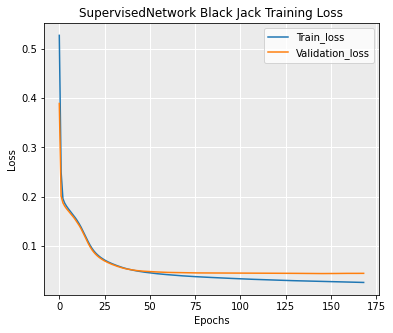

In [30]:
if valid_loss_res:
    x= [i for i in range(len(valid_loss_res))]
    fig,axes= plt.subplots(figsize=(6,5))
    plt.plot(x, train_loss_res, label = "Train_loss")
    plt.plot(x,valid_loss_res, label = "Validation_loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    the_target='Black Jack'
    model_name = model.__class__.__name__
    axes.set_title(str(model_name)+ ' '+the_target+ ' '+'Training Loss')
    axes.legend()
    axes.set_facecolor('#EBEBEB')
    axes.grid(which='major', color='white', linewidth=1)
    plt.show()
with open('loss_recorder.txt', 'a') as f:
    f.write(str(model_name)+ '  '+ '  '+'12_64_64'+':')
    f.write('\n')
    for item in zip(valid_loss_res,valid_loss_res):
        f.write(str(item[0])+'   '+str(item[0]))
        f.write('\n')


In [32]:
model.load_state_dict(torch.load('model_cifar_without_act.pt'))

<All keys matched successfully>

In [33]:
test_loss = 0
class_correct = [0 for _ in range(2)]
class_total = [0 for _ in range(2)]

model.eval()

counter=0
for i_batch, sample_batched in enumerate(test_loader):
    images_batch, labels_batch = sample_batched['data'], sample_batched['labels']
    img=images_batch.float()
    target = labels_batch.long()
    if train_on_gpu:
        img,  target = img.cuda(), target.cuda()

    output = model(img)
    loss = criterion( output, target)

#     loss = criterion(img, output, target)

    test_loss += loss.item()*img.size(0)

    _, pred = torch.max(output, 1)    

    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())

    for i in range(batch_size):
#         print(counter)
        if counter==len(df)//10:# the length of the testing set
            break
#         label = target.data
#         class_correct[label] += correct.item()
        label = target[i].data
        class_correct[label] += correct[i].item()
        class_total[label] += 1
        counter += 1
       
    # average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.032849

Test Accuracy of   hit: 99% (2456/2471)
Test Accuracy of stand: 98% (2488/2529)

Test Accuracy (Overall): 98% (4944/5000)
